# Battleship Reinforcement Learning Project

This notebook demonstrates the implementation of various agents for playing the Battleship game:
1. Random Agent (baseline)
2. Smart Agent (with explore-exploit strategy)
3. Q-Learning Agent (reinforcement learning)

We'll train each agent, evaluate its performance, and compare results across agents.

## Setup and Installation

In [1]:
# Install required packages
!pip install gym matplotlib numpy pandas


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Check if running in Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Running in Google Colab")
    # Create Python files if running in Colab
    # You can paste the file contents here
else:
    print("Running locally")

Running locally


## Import Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from datetime import datetime

# Import our custom modules
from battleship_env import BattleshipEnv, create_test_scenario, setup_results_directory
from random_agent import RandomAgent, train_random_agent, evaluate_random_agent
from smart_agent import SmartAgent, train_smart_agent, evaluate_smart_agent
from qlearning_agent import QLearningAgent, train_qlearning_agent, evaluate_qlearning_agent
from model_comparison import compare_agents, load_agent_from_file

## Test Environment Creation

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


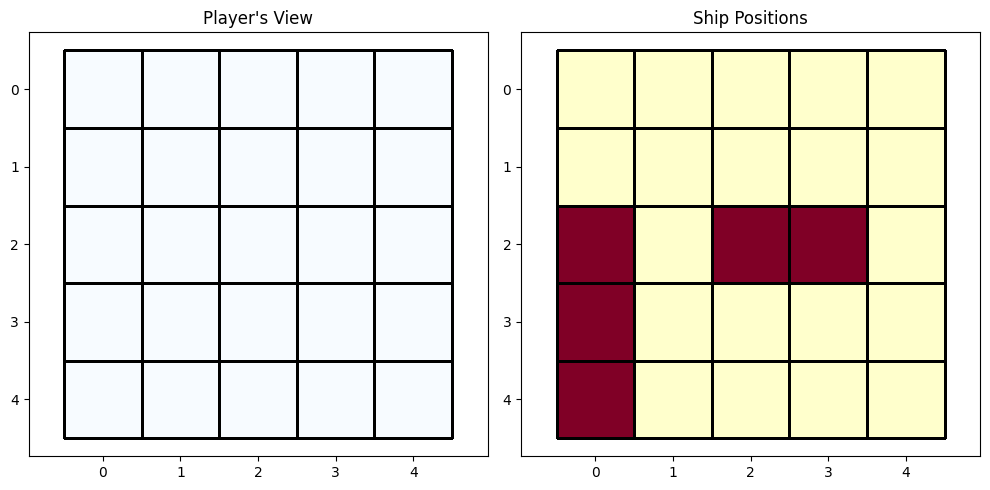

Ship positions:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [3 0 2 2 0]
 [3 0 0 0 0]
 [3 0 0 0 0]]


In [4]:
# Create a test environment
env = BattleshipEnv(grid_size=5, ships_config=[3, 2])
observation = env.reset()

# Render the initial state
env.render()

# Print the ship grid (this would be hidden from the player in a real game)
print("Ship positions:")
print(env.ship_grid)

## **Enhanced QLearning Agent**

In [16]:
from FinalProject.enhanced_qlearning_agent import train_enhanced_qlearning_agent, evaluate_enhanced_qlearning_agent, \
    progressive_training

# Standard training (20,000 episodes)
enhanced_qlearning_agent, results = train_enhanced_qlearning_agent(episodes=100000, grid_size=10, ships_config=[4, 3, 2])

Episode 100/100000 | Exploration rate: 0.2986 | Recent avg shots: 120.86 | Recent avg reward: 25.68 | Time elapsed: 2.9s | Est. time remaining: 2870.6s
Episode 200/100000 | Exploration rate: 0.1402 | Recent avg shots: 75.63 | Recent avg reward: 28.71 | Time elapsed: 5.0s | Est. time remaining: 2490.9s
Episode 300/100000 | Exploration rate: 0.1000 | Recent avg shots: 68.82 | Recent avg reward: 30.20 | Time elapsed: 7.0s | Est. time remaining: 2330.3s
Episode 400/100000 | Exploration rate: 0.1000 | Recent avg shots: 69.70 | Recent avg reward: 30.05 | Time elapsed: 9.0s | Est. time remaining: 2250.5s
Episode 500/100000 | Exploration rate: 0.1000 | Recent avg shots: 64.83 | Recent avg reward: 30.54 | Time elapsed: 11.0s | Est. time remaining: 2198.2s
Episode 600/100000 | Exploration rate: 0.1000 | Recent avg shots: 68.81 | Recent avg reward: 30.14 | Time elapsed: 13.1s | Est. time remaining: 2169.1s
Episode 700/100000 | Exploration rate: 0.1000 | Recent avg shots: 65.07 | Recent avg reward

In [21]:
# Train the smart agent
print("Training Smart Agent...")
smart_agent, smart_results = train_smart_agent(episodes=100, grid_size=10, ships_config=[4, 3, 2])
smart_agent.save("saved_agents/q_learning/smart_agent.pkl")


Training Smart Agent...
Episode 10/100 completed.
Recent average shots: 66.40
Episode 20/100 completed.
Recent average shots: 63.60
Episode 30/100 completed.
Recent average shots: 55.60
Episode 40/100 completed.
Recent average shots: 58.10
Episode 50/100 completed.
Recent average shots: 62.90
Episode 60/100 completed.
Recent average shots: 65.10
Episode 70/100 completed.
Recent average shots: 49.80
Episode 80/100 completed.
Recent average shots: 69.00
Episode 90/100 completed.
Recent average shots: 59.30
Episode 100/100 completed.
Recent average shots: 48.30

Training completed for Smart Agent
Average shots to win: 59.81
Win rate: 1.00
Results saved to: battleship_results\training\SmartAgent_20250327_015912


In [17]:
enhanced_qlearning_agent.save("saved_agents/q_learning/q_100000.pkl")


## **Tournament**

In [22]:
from FinalProject.visual_game_player import VisualGamePlayer

agent1 = load_agent_from_file("saved_agents/q_learning/q_100000.pkl")
agent2 = load_agent_from_file("saved_agents/q_learning/smart_agent.pkl")

# Create visual game player with custom names
player = VisualGamePlayer(
    grid_size=10, ships_config=[4, 3, 2],
    agent1=agent1, agent2=agent2,
    agent1_name="QLearningAgent",
    agent2_name="SmartAgent",
    use_gui=True  # Set to False for command line interface
)

# Start the game
player.play_game(True)

In [2]:
from FinalProject.hybrid_agent import train_hybrid_agent, evaluate_hybrid_agent, compare_with_other_agents

## **Hybrid Agent**
# Train the hybrid agent
hybrid_agent, train_results = train_hybrid_agent(
    episodes=10000,
    grid_size=10,
    ships_config=[4, 3, 2],
    exploration_rate=0.3  # Controls how random the Q-learning component is
)
# Evaluate the agent
test_results = evaluate_hybrid_agent(
    hybrid_agent,
    test_episodes=100,
    fixed_test=False  # Set to True for testing on a fixed board configuration
)


basic_smart_agent = load_agent_from_file("saved_agents/q_learning/smart_agent.pkl")


Episode 100/10000 | Mode: explore | Recent avg shots: 75.11 | Recent avg mode switches: 3.24 | Time elapsed: 2.2s | Est. time remaining: 220.2s
Episode 200/10000 | Mode: explore | Recent avg shots: 71.95 | Recent avg mode switches: 3.38 | Time elapsed: 4.3s | Est. time remaining: 211.0s
Episode 300/10000 | Mode: explore | Recent avg shots: 72.31 | Recent avg mode switches: 3.16 | Time elapsed: 6.4s | Est. time remaining: 206.6s
Episode 400/10000 | Mode: explore | Recent avg shots: 70.58 | Recent avg mode switches: 3.22 | Time elapsed: 8.5s | Est. time remaining: 203.0s
Episode 500/10000 | Mode: explore | Recent avg shots: 71.95 | Recent avg mode switches: 3.27 | Time elapsed: 10.5s | Est. time remaining: 199.6s
Episode 600/10000 | Mode: explore | Recent avg shots: 74.97 | Recent avg mode switches: 3.39 | Time elapsed: 12.6s | Est. time remaining: 197.8s
Episode 700/10000 | Mode: explore | Recent avg shots: 70.79 | Recent avg mode switches: 3.13 | Time elapsed: 14.7s | Est. time remaini

IndexError: index 5 is out of bounds for axis 1 with size 5

In [3]:
# Compare with other agents
comparison_results, tournament = compare_with_other_agents(
    grid_size=10,
    ships_config=[4, 3, 2],
    hybrid_agent=hybrid_agent,
    episodes=50
)

TypeError: TournamentComparison.__init__() got an unexpected keyword argument 'agent_names'

## Conclusion

This notebook demonstrates the implementation of three different agents for playing the Battleship game:
1. Random Agent: Makes random guesses (baseline)
2. Smart Agent: Uses a simple explore-exploit strategy
3. Q-Learning Agent: Uses reinforcement learning to improve over time

Key findings:
- The Random Agent provides a baseline performance
- The Smart Agent significantly improves over random guessing by using a targeted approach after finding hits
- The Q-Learning Agent learns optimal strategies through experience, potentially outperforming both other agents with sufficient training

The model comparison framework allows for fair evaluation of different strategies on the same test scenarios.